This file handles filtering and pre-processing the train and validation data. It also shows the distribution of train and validation data.

A lot of the methods used here also exist in the "Dataset_Augmentation_and_PreProcessing" file. This is because I accidentally hit "restart kernal", and the file takes days to run.

In [21]:
from datasets import load_dataset
import pandas as pd
!pip install lingua-language-detector



#loading the dataset
dataset = load_dataset("grosenthal/latin_english_translation")

df_train=pd.DataFrame(dataset["train"])

df_train.head()


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


,id,la,en,file
0,81997,post haec ambulabat Iesus in Galilaeam non enim volebat in Iudaeam ambulare quia quaerebant eum Iudaei interficere,"After these things, Jesus walked in Galilee: for he would not walk in Judea, because the Jews sought to kill him.",final_alignments\Vulgate_Bible.json
1,65040,"Despectus tibi sum nec, qui sim, quaeris, Alexi, quam dives pecoris, nivei quam lactis abundans: mille meae Siculis errant in montibus agnae; lac mihi non aestate novum, non frigore defit.","You scorn me, Alexis, and ask not what I am'how rich in cattle, how wealthy in snow-white milk! A thousand lambs of mine roam over the Sicilian hills; new milk fails me not, summer or winter.",final_alignments\Virgil_Eclogues.json
2,15899,"frumenta non solum tanta multitudine iumentorum atque hominum consumebantur, sed etiam anni tempore atque imbribus procubuerant ut, si qui etiam in praesentia se occultassent, tamen his deducto exercitu rerum omnium inopia pereundum videretur.","the corn not only was being consumed by so great numbers of cattle and men, but also had fallen to the earth, owing to the time of the year and the storms; so that if any had concealed themselves for the present, still, it appeared likely that they must perish through want of all things, when the army should be drawn off.",final_alignments\Caesar_DBG_Book6.json
3,38602,Talibus hic Poenus; sed contra Oenotria pubes non ullas voces ducis aut praecepta requirit.,"Thus spoke Hannibal; but the men of Rome, on their side, needed no speech or appeal from any leader.",final_alignments\Silius_Italicus_Punica_Book12.json
4,29514,"non tulit ulterius capti blasphemia monstri Virtutum regina Fides, sed verba loquentis inpedit et vocis claudit spiramina pilo, pollutam rigida transfigens cuspide linguam.","No further did Faith, the Virtues queen, bear with the outrageous prisoners blasphemies, but stopped her speech and blocked the passage of her voice with a javelin, driving its hard point through the foul tongue.",final_alignments\Prudentius_Psychomachia.json


In [22]:
df_valid=pd.DataFrame(dataset["valid"])
df_test=pd.DataFrame(dataset["test"])

df_valid.head()

,id,la,en,file
0,36149,"nam memor originis tuae nobilium sibi persuasit universitas, quamdiu nos Sabini familia rexerit, Sabiniani familiam non timendam.","For the whole body of our nobility, remembering the race from which you are sprung, is convinced that so long as the family of Sabinus provides our governors, we need not fear the family of Sabinianus.",final_alignments\Sidonius_Letters_Book3.json
1,81250,super aspidem et basiliscum calcabis conculcabis leonem et draconem,super aspidem et basiliscum ambulabis et; conculcabis leonem et draconem,final_alignments\Vulgate_Bible.json
2,27252,"Tanta tibi bene faciendi vis, ut indulgentia tua necessitates aemuletur.",Such is your power to do good that your gracious favour has the same effect as stern necessity.,final_alignments\Pliny_Younger_Panegyricus.json
3,28719,"tempore nec senior Pater est, nec numine maior, nam sapiens retro semper Deus edidit ex se, per quod semper erat, gignenda ad saecula Verbum.","The Father is neither older in time nor greater in divinity; for God was wise through infinite time past, and gave forth from Himself, to bring the world into being, the Word whereby He ever was.",final_alignments\Prudentius_Divinity_Of_Christ.json
4,30648,"Iamque immissi in medium Persarum undique circumfusi egregie tuebantur se; sed conferti et quasi cohaerentes tela vibrare non poterant: simul erant emissa, invicem concurrentia implicabantur levique et vano ictu pauca in hostem, plura in humum innoxia cadebant.","And now, having plunged into the midst of the Persians, although surrounded on all sides, they were defending themselves valiantly; but being crowded together and, as it were, joined man to man, they were not able to poise their weapons, and as soon as these were hurled, they met one another and were entangled, so that a few fell upon the enemy with a light and ineffective stroke, but more dropped harmless to the ground.",final_alignments\Quintus_Curtius_Alexander_Book3.json


In [23]:
def filter_data(df, file_list):


    # Keep only rows where the file name is in the specified list
    filtered_df = df[df['file'].isin(file_list)]



    return filtered_df

# List of files to keep
files_to_keep = [
    "final_alignments\Vulgate_Bible.json",
    "final_alignments\Cato_Agriculture.json",
    "final_alignments\Tertullian_Apology.json",
    "final_alignments\Sallust_Jugurtha.json",
    "final_alignments\Velleius_Paterculus_Compendium.json"
]
def reset_ids(df):
    # Assuming 'id' is the column that needs to be reset
    df['id'] = range(1, len(df) + 1)
    return df
# Assuming df_valid and df_test are your validation and test DataFrames
df_valid_filtered = reset_ids(filter_data(df_valid, files_to_keep)) 
df_test_filtered = reset_ids(filter_data(df_test, files_to_keep))  

/var/folders/h8/scrn1qk15gb4l2s8189k30080000gn/T/ipykernel_65872/1390988365.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = range(1, len(df) + 1)


In [24]:
from lingua import Language, LanguageDetectorBuilder

languages = [Language.ENGLISH, Language.LATIN]
detector = LanguageDetectorBuilder.from_languages(*languages).with_minimum_relative_distance(0.6).build()

#removing the wrong data from the validation and test datasets
def find_language_mismatches(df, latin_column, english_column, id_column):
    mismatch_ids = []

    for index, row in df.iterrows():
        latin_text = row[latin_column]
        english_text = row[english_column]

        # Detect language of the text in each column
        detected_language_latin_text = detector.detect_language_of(latin_text)
        detected_language_english_text = detector.detect_language_of(english_text)

        # Check for language mismatch and add ID to list if mismatch is found
        if detected_language_latin_text == Language.ENGLISH or detected_language_english_text == Language.LATIN:
            mismatch_ids.append(row[id_column])

    return mismatch_ids

mismatched_ids_validation = find_language_mismatches(df_valid_filtered, 'la', 'en', 'id')

mismatched_ids_test= find_language_mismatches(df_test_filtered, 'la', 'en', 'id')

In [25]:
def create_mismatched_df(original_df, mismatched_ids, id_column):
    # Filter the original DataFrame to keep only the rows with the specified IDs
    mismatched_df = original_df[original_df[id_column].isin(mismatched_ids)]
    return mismatched_df

mismatchcheker= df_valid_filtered.copy()
#vewing the cases to see if they are valid

mismatched_df = create_mismatched_df(mismatchcheker, mismatched_ids_validation, 'id')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
display(mismatched_df)

,id,la,en,file
1,1,super aspidem et basiliscum calcabis conculcabis leonem et draconem,super aspidem et basiliscum ambulabis et; conculcabis leonem et draconem,final_alignments\Vulgate_Bible.json
41,17,volvetur annus in bonitate tua et vestigia tua rorabunt pinguidine,benedices coronae anni benignitatis tuae et campi tui replebuntur ubertate,final_alignments\Vulgate_Bible.json
75,30,non fecit similiter omni genti et iudicia eius non cognoscent alleluia,non fecit taliter omni nationi et iudicia sua non manifestavit eis,final_alignments\Vulgate_Bible.json
136,48,Noga quoque et Napheg et Iaphiae,"And Noga, and Napheg, and Japhia,",final_alignments\Vulgate_Bible.json
244,87,quia tu populum pauperem salvabis et oculos excelsos humiliabis,quoniam tu populum humilem salvum facies et oculos superborum humiliabis,final_alignments\Vulgate_Bible.json
282,96,quia mille anni in oculis tuis sicut dies hesterna quae pertransiit et vigilia nocturna,quoniam mille anni ante oculos tuos tamquam dies hesterna quae praeteriit et custodia in nocte,final_alignments\Vulgate_Bible.json
353,123,dixi inique agentibus nolite inique agere et impiis nolite exaltare cornu,dixi iniquis nolite inique facere et delinquentibus nolite exaltare cornu,final_alignments\Vulgate_Bible.json
416,152,misertus est mei Dominus vidit adflictionem meam ex inimicis meis,miserere mei Domine vide humilitatem meam de inimicis meis,final_alignments\Vulgate_Bible.json
547,189,usquequo exaltabitur inimicus meus super me,usquequo exaltabitur inimicus meus super me,final_alignments\Vulgate_Bible.json
636,228,tunc implebitur risu os nostrum et lingua nostra laude tunc dicent in gentibus magnificavit Dominus facere cum istis,tunc repletum est gaudio os nostrum et lingua nostra exultatione tunc dicent inter gentes magnificavit Dominus facere cum eis,final_alignments\Vulgate_Bible.json


In [26]:
invalid_validation=[
    
    1, 17, 30, 87, 96,123, 152, 189, 228, 233, 237, 238, 354
    
]
def filter_out_ids(df, ids_to_remove, id_column):
    # Filter out the rows with the specified IDs
    filtered_df = df[~df[id_column].isin(ids_to_remove)]
    return filtered_df

validation_data= filter_out_ids(df_valid_filtered, invalid_validation, 'id')

validation_data.to_csv("validation_data_filtered.csv")

In [27]:
mismatchcheker= df_test_filtered.copy()
#vewing the cases to see if they are valid


mismatched_df = create_mismatched_df(mismatchcheker, mismatched_ids_test, 'id')

display(mismatched_df)

,id,la,en,file
71,32,os meum narrabit iustitiam tuam tota die salutare tuum quia non cognovi litteraturas,os meum adnuntiabit iustitiam tuam tota die salutem tuam quoniam non cognovi litteraturam,final_alignments\Vulgate_Bible.json
73,33,in circuitu impii ambulabunt cum exaltati fuerint vilissimi filiorum hominum,in circuitu impii ambulant secundum altitudinem tuam multiplicasti filios hominum,final_alignments\Vulgate_Bible.json
126,52,iustitia tua erue me et libera inclina ad me aurem tuam et salva me,in iustitia tua libera me et eripe me inclina ad me aurem tuam et salva me,final_alignments\Vulgate_Bible.json
148,58,gloria eius in caelo et in terra et exaltavit cornu populi sui laus omnibus sanctis eius filiis Israhel populo adpropinquanti sibi alleluia,confessio eius super caelum et terram et exaltabit cornu populi sui hymnus omnibus sanctis eius filiis Israhel populo adpropinquanti sibi,final_alignments\Vulgate_Bible.json
169,60,conputruerunt et tabuerunt cicatrices meae a facie insipientiae meae,putruerunt et corruptae sunt cicatrices meae a facie insipientiae meae,final_alignments\Vulgate_Bible.json
376,152,loquentem in abscondito contra proximum suum hunc interficiam superbum oculis et altum corde cum hoc esse non potero,detrahentem secreto proximo suo hunc persequebar superbo oculo et insatiabili corde cum hoc non edebam,final_alignments\Vulgate_Bible.json
500,188,et qui reddunt malum pro bono adversabantur mihi quia sequebar bonum,qui retribuunt mala pro bonis detrahebant mihi quoniam sequebar bonitatem,final_alignments\Vulgate_Bible.json
551,212,inpulsus pellebar ut caderem et Dominus sustentavit me,inpulsus eversus sum ut caderem et Dominus suscepit me,final_alignments\Vulgate_Bible.json
575,224,et eram quasi homo non audiens nec habens in ore suo redargutiones,et factus sum sicut homo non audiens et non habens in ore suo redargutiones,final_alignments\Vulgate_Bible.json
753,281,non est similis tui in diis Domine non est iuxta opera tua,non est similis tui in diis Domine et non est secundum opera tua,final_alignments\Vulgate_Bible.json


In [30]:
invalid_test=[32, 33, 52, 58, 60, 152, 188, 212, 224, 281, 320, 321, 339, 351, 366, 369]
test_data= filter_out_ids(df_valid_filtered, invalid_test, 'id')

test_data.to_csv("test_data_filtered.csv")

In [32]:
test_data.head(333)


,id,la,en,file
1,1,super aspidem et basiliscum calcabis conculcabis leonem et draconem,super aspidem et basiliscum ambulabis et; conculcabis leonem et draconem,final_alignments\Vulgate_Bible.json
14,2,"Quid si noluerint vel nullae fuerint? quid denique singulares Christiani? Non erit, opinor, legitimus Christianus nisi frater aut filius.","But if they wont come, or if you have none? What, Christians with no relatives? I suppose, a man is not a regular Christian unless he is a brother or a son.",final_alignments\Tertullian_Apology.json
15,3,propterea ergo magis quaerebant eum Iudaei interficere quia non solum solvebat sabbatum sed et Patrem suum dicebat Deum aequalem se faciens Deo respondit itaque Iesus et dixit eis,"Hereupon therefore the Jews sought the more to kill him, because he did not only break the sabbath but also said God was his Father, making himself equal to God.",final_alignments\Vulgate_Bible.json
16,4,nonne istae sunt quae deceperunt filios Israhel ad suggestionem Balaam et praevaricari vos fecerunt in Domino super peccato Phogor unde et percussus est populus,"Are not these they, that deceived the children of Israel by the counsel of Balaam, and made you transgress against the Lord by the sin of Phogor, for which also the people was punished?",final_alignments\Vulgate_Bible.json
17,5,non addetis ad verbum quod vobis loquor neque auferetis ex eo custodite mandata Domini Dei vestri quae ego praecipio vobis,"You shall not add to the word that I speak to you, neither shall you take away from it: keep the commandments of the Lord your God which I command you.",final_alignments\Vulgate_Bible.json
18,6,ut recorderis et confundaris et non sit tibi ultra aperire os prae confusione tua cum placatus fuero tibi in omnibus quae fecisti ait Dominus Deus,"That thou mayest remember, and be confounded, and mayest no more open thy mouth because of thy confusion, when I shall be pacified toward thee for all that thou hast done, saith the Lord God.",final_alignments\Vulgate_Bible.json
19,7,aedificavit quoque altaria in domo Domini de qua dixerat Dominus in Hierusalem erit nomen meum in aeternum,"He built also altars in the house of the Lord, whereof the Lord had said: In Jerusalem shall my name be for ever.",final_alignments\Vulgate_Bible.json
21,8,et elefantis ostenderunt sanguinem uvae et mori ad acuendos eos in proelium,"And they shewed the elephants the blood of grapes, and mulberries, to provoke them to fight.",final_alignments\Vulgate_Bible.json
22,9,et portam Vallis aedificavit Anun et habitatores Zanoe ipsi aedificaverunt eam et statuerunt valvas eius et seras et vectes et mille cubitos in muro usque ad portam Sterquilinii,"And the gate of the valley Hanun built, and the inhabitants of Zanoe: they built it, and set up the doors thereof, and the locks, and the bars, and a thousand cubits in the wall unto the gate of the dunghill.",final_alignments\Vulgate_Bible.json
23,10,fecerunt igitur Levitae et universus Iuda iuxta omnia quae praeceperat Ioiadae pontifex et adsumpserunt singuli viros qui sub se erant et veniebant per ordinem sabbati cum his qui iam impleverant sabbatum et egressuri erant siquidem Ioiadae pontifex non dimiserat abire turmas quae sibi per singulas ebdomadas succedere consueverant,"So the Levites, and all Juda did according to all that Joiada the high priest had commanded: and they took every one his men that were under him, and that came in by the course of the sabbath, with those who had fulfilled the sabbath, and were to go out. For Joiada the high priest permitted not the companies to depart, which were accustomed to succeed one another every week.",final_alignments\Vulgate_Bible.json


In [33]:
print(validation_data.shape[0])


363


In [34]:
print(test_data.shape[0])

360


<Axes: xlabel='file'>

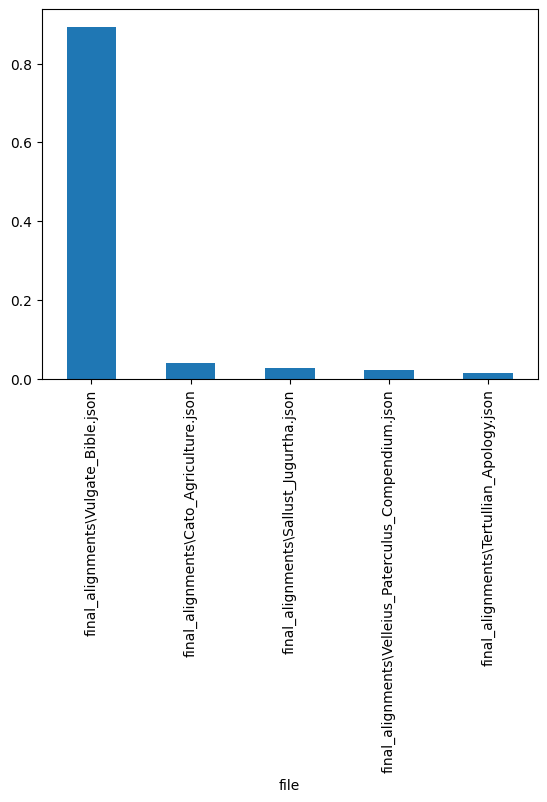

In [35]:
validation_data["file"].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='file'>

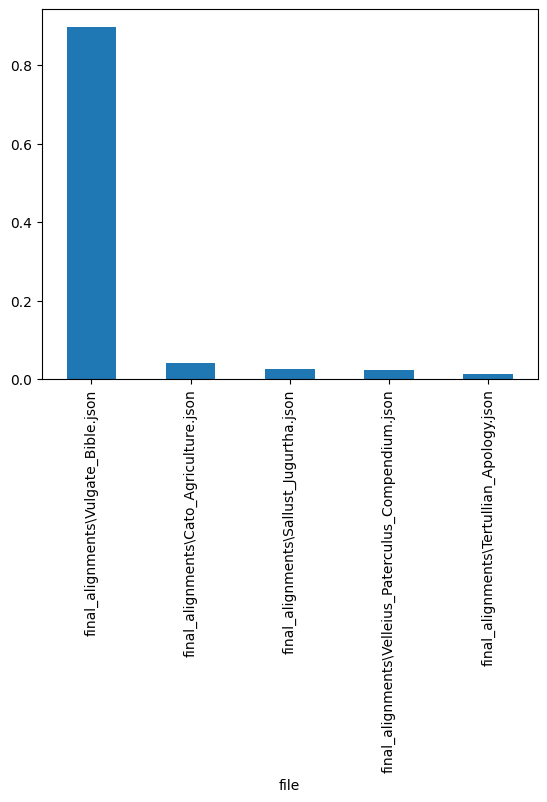

In [36]:
test_data['file'].value_counts(normalize=True).plot(kind='bar')

Pre-processing the validation and test data 

In [42]:
import subprocess

version = subprocess.check_output(['java', '-version'], stderr=subprocess.STDOUT)
print (version.decode())



openjdk version "1.8.0_382"
IBM Semeru Runtime Open Edition (build 1.8.0_382-b05)
Eclipse OpenJ9 VM (build openj9-0.40.0, JRE 1.8.0 Mac OS X amd64-64-Bit Compressed References 20230810_763 (JIT enabled, AOT enabled)
OpenJ9   - d12d10c9e
OMR      - e80bff83b
JCL      - c4d2c2bafb based on jdk8u382-b05)


In [43]:
import os

java_8_path= "/Library/Java/JavaVirtualMachines/ibm-semeru-open-8.jdk/Contents/Home"
os.environ['JAVA_HOME'] = java_8_path # Set JAVA_HOME to Java 8 JDK path


# Add Java 8 bin to PATH
os.environ['PATH'] = java_8_path + "/bin:" + os.environ['PATH']

version = subprocess.check_output(['java', '-version'], stderr=subprocess.STDOUT)
print(version.decode())

openjdk version "1.8.0_382"
IBM Semeru Runtime Open Edition (build 1.8.0_382-b05)
Eclipse OpenJ9 VM (build openj9-0.40.0, JRE 1.8.0 Mac OS X amd64-64-Bit Compressed References 20230810_763 (JIT enabled, AOT enabled)
OpenJ9   - d12d10c9e
OMR      - e80bff83b
JCL      - c4d2c2bafb based on jdk8u382-b05)


In [44]:
#dependancies you need for pycontractions to work
!pip install git+https://github.com/MCFreddie777/language-check.git

!pip install pyemd
!pip install POT

  Cloning https://github.com/MCFreddie777/language-check.git to /private/var/folders/h8/scrn1qk15gb4l2s8189k30080000gn/T/pip-req-build-vnx__43_
  Running command git clone --filter=blob:none --quiet https://github.com/MCFreddie777/language-check.git /private/var/folders/h8/scrn1qk15gb4l2s8189k30080000gn/T/pip-req-build-vnx__43_
  Resolved https://github.com/MCFreddie777/language-check.git to commit 337493f25b5a49af0a09b0e264f306eccefaff8f
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [45]:
import re

#From the dataset augmentation file:
def expand_latin_contractions_in_dataframe(df):
    def reverse_contractions(text):
        
        #lower case        
        text=text.lower()

        # Rule 1: -re to -ris
        text = re.sub(r'(\w+)re\b', r'\1ris', text)

        # Rule 2: -ere to -erunt
        text = re.sub(r'(\w+)ere\b', r'\1erunt', text)
    
        #Rule 3: "forem, forēs," etc. to "essem, essēs," etc.
        text = re.sub(r'\bforem\b', 'essem', text)
        text = re.sub(r'\bforēs\b', 'essēs', text)
        text = re.sub(r'\bforet\b', 'esset', text)
        text = re.sub(r'\bforēmus\b', 'essēmus', text)
        text = re.sub(r'\bforētis\b', 'essētis', text)
        text = re.sub(r'\bforent\b', 'essent', text)
    
            # Rule 4: suppressing -vi- and -ve-
        text = re.sub(r'(\w+)stis\b', r'\1vistis', text)
        text = re.sub(r'(\w+)ssent\b', r'\1vissent', text)
        text = re.sub(r'(\w+)sse\b', r'\1visse', text)
        text = text.replace('nosti', 'novisti')
        text = text.replace('amavere', 'amaverunt')
        text = text.replace('noram', 'noveram')

        # Rule 5: contractions after si, nisi, num, ne
        text = re.sub(r'\b(si|nisi|num|ne) qui\b', r'\1 aliquis', text)
        text = re.sub(r'\b(si|nisi|num|ne) qua\b', r'\1 aliqua', text)
        text = re.sub(r'\b(si|nisi|num|ne) quod\b', r'\1 aliquid', text)

        # Rule 6: Shortened forms
        text = text.replace('ac', 'atque')
        text = text.replace('di', 'dei')
        text = text.replace('deum', 'deorum')
        text = text.replace('dis', 'deis')
        text = text.replace("vin'", 'visne')
        text = text.replace("scin'", 'scisne')
        text = text.replace('sīs', 'si vis')
        text = text.replace('sodēs', 'si audes')
        text = text.replace('sultis', 'si vultis')

        # Rule 7: Contractions in old poets
        text = text.replace('homost', 'homo est')
        text = text.replace('periculumst', 'periculum est')
        text = text.replace('ausust', 'ausus est')
        text = text.replace('qualist', 'qualis est')
        
        return text

    df['la'] = df['la'].apply(reverse_contractions)
    return df

from pycontractions import Contractions
cont = Contractions('GoogleNews-vectors-negative300.bin')
cont.load_models()

def expand_english_contractions_in_dataframe(df):
    df['en'] = [text.lower() for text in cont.expand_texts(df['en'], precise=True)]
    return df

import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

latin_stopwords= ["ab, ac, ad, adhic, aliqui, aliquis, an, ante, apud, at, atque, aut, autem, cum, cur, de, deinde, dum, ego, enim, ergo, es, est, et, etiam, etsi, ex, fio, haud, hic, iam, idem, igitur, ille, in, infra, inter, interim, ipse, is, ita, magis, modo, mox, nam, ne, nec, necque, neque, nisi, non, nos, o, ob, per, possum, post, pro, quae, quam, quare, qui, quia, quicumque, quidem, quilibet, quis, quisnam, quisquam, quisque, quisquis, quo, quoniam, sed, si, sic, sive, sub, sui, sum, super, suus, tam, tamen, trans, tu, tum, ubi, uel, uero, unus, ut"]

latin_stopwords = latin_stopwords[0].split(", ")

def remove_stopwords_from_df(df, latin_column, english_column, latin_sw, eng_sw):
    latin_stopwords_set = set(latin_sw)  # Convert stopwords to a set for faster lookup
    english_stopwords_set= set(eng_sw)
    
    # Update the Latin column
    for index in df.index:
        df.at[index, latin_column] = ' '.join([word for word in str(df.at[index, latin_column]).split() if word not in latin_stopwords_set])

    # Update the English column
    for index in df.index:
        df.at[index, english_column] = ' '.join([word for word in str(df.at[index, english_column]).split() if word not in english_stopwords_set])
    
    return df

from cltk.lemmatize.lat import LatinBackoffLemmatizer
from nltk.stem import WordNetLemmatizer

english_lemmatizer = WordNetLemmatizer()
latin_lemmatizer= LatinBackoffLemmatizer()

def lemmatize_latin(text):
    lemmatized = latin_lemmatizer.lemmatize(text.split())
    # Use regular expression to remove numbers from the lemmas
    lemmatized_words = [re.sub(r'\d+', '', lem[1]) for lem in lemmatized]
    return ' '.join(lemmatized_words)

# Function to lemmatize English text
def lemmatize_english(text):
    lemmatized_words = [english_lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized_words)

# Function to apply lemmatization to DataFrame columns
def lemmatize_columns_in_df(df, latin_column, english_column):
    # Update the Latin column
    for index in df.index:
        df.at[index, latin_column] = lemmatize_latin(str(df.at[index, latin_column]))

    # Update the English column
    for index in df.index:
        df.at[index, english_column] = lemmatize_english(str(df.at[index, english_column]))
    
    return df


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saifshahin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
validation_data_sw_removed= remove_stopwords_from_df(validation_data.copy(), "la", "en",latin_stopwords, english_stop_words )
validation_data_lemmatized_sw_removed= lemmatize_columns_in_df(validation_data_sw_removed.copy(), "la", "en")
validation_data_lemmatized= lemmatize_columns_in_df(validation_data.copy(), "la", "en")

test_data_sw_removed= remove_stopwords_from_df(test_data.copy(), "la", "en",latin_stopwords, english_stop_words )
test_data_lemmatized_sw_removed=lemmatize_columns_in_df(test_data_sw_removed.copy(), "la", "en")
test_data_lemmatized= lemmatize_columns_in_df(test_data.copy(), "la", "en")

validation_data_sw_removed.to_csv("validation_data_sw_removed.csv")
validation_data_lemmatized_sw_removed.to_csv("validation_data_lemmatized_sw_removed.csv")
validation_data_lemmatized.to_csv("validation_data_lemmatized.csv")

test_data_sw_removed.to_csv("test_data_sw_removed.csv")
test_data_lemmatized_sw_removed.to_csv("test_data_lemmatized_sw_removed.csv")
test_data_lemmatized.to_csv("test_data_lemmatized.csv")

